# Introduction <a id='BTT'></a>

Getting admitted to graduate school can be a daunting and grueling process. 

From having to take standardized tests, getting multiple written letters of recommendation, writing a statement of purpose, to forking over application fee, it isn't unreasonable to stop and ask yourself, "am I competitive enough to be accepted to graduate school?"

The following analysis aims to predict chance of being admitted into graduate school (0 to 100% chance) through multiple linear regression utilizing the following dataset:

**Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019 [(obtained from Kaggle)](https://www.kaggle.com/mohansacharya/graduate-admissions)**

The dataset is from the perspective of 500 Indian students and contains the following variables/features:

1. Serial No (ID variable)
2. GRE Score (out of 340; *older score format*)
3. TOEFL Score (out of 120; *older score format*)
4. University Rating (out of 5)
5. Statement of Purpose (SOP) Strength (out of 5)
6. Letter of Recommendation (LOR) Strength (out of 5)
7. Undergraduate GPA (CGPA; out of 10)
8. Research Experience (either 0 or 1)
9. Chance of Admit (range from 0 to 1)

## Table of Contents
1. [Exploratory Analysis](#EDA)
2. [Split and Scale Data](#SPSC)
3. [Linear Regression (Full Model)](#LRF)
4. [Linear Regression (SelectKBest)](#LRSKB)
5. [Predicting the Chance of Admit of 7 Students](#PRED)
6. [Key Takeaways and Next Steps](#KN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read in CSV
ga = pd.read_csv('grad-admission.csv')

# Exploratory Data Analysis<a id='EDA'></a>

In [3]:
# use info function to see column names, data type, and if there are any null/missing values
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
# Use the describe function to get basic descriptive statistics for each column
ga.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# Dropped 'Serial No' column since it is an ID column and does not aid in analysis
ga_clean = ga.drop('Serial No.', axis = 1)
ga_clean.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# Convert CGPA to GPA
ga_clean['GPA'] = ga_clean['CGPA'].apply(lambda x: (((x/10)*90)/100)*4)

In [7]:
# create new column to categorize 'Chance of Admit'

# 1: 0-25% (low)
# 2: 26 - 50% (medium)
# 3: 51 - 75% (high)
# 4: 76-100% (very high)

def chance_cat(x):
    if x < 0.26:
        return 'Low'
    elif x < 0.51:
        return 'Medium'
    elif x < 0.76:
        return 'High'
    else:
        return 'Very High'
    
ga_clean['COA Cat'] = ga_clean['Chance of Admit '].apply(chance_cat)

The Histogram of GRE Scores (left) indicates that most students score between 310 and 325. General conclusions from the Histogram of GRE Scores by Chance of Admit category (right) are:

- Students who have a 'medium' (26% to 50%) chance of being admitted score between 290 to 315 on the GRE.
- Students who have a 'high' (51% to 75%) chance of being admitted score between 290 to 330 on the GRE.
- Students who have a 'very high' (76%+) score between 300 and 340 on the GRE.
- Students who want to maximize their chances of being admitted into graduate school should score, at minimum, a 300 on the GRE.

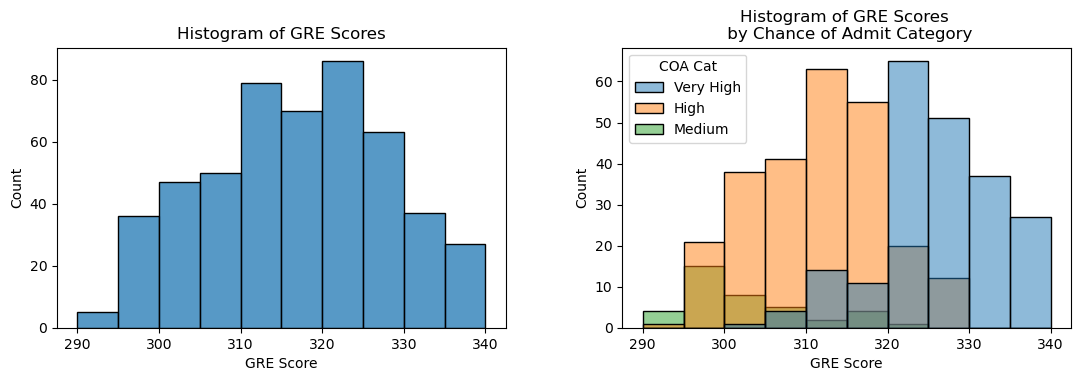

In [8]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# histogram for gre scores
sns.histplot(x = 'GRE Score', data = ga_clean, ax = ax1, bins = 10)
ax1.title.set_text('Histogram of GRE Scores')

# histogram for gre scores by chance of admit category
sns.histplot(x = 'GRE Score', data = ga_clean, hue = 'COA Cat', ax = ax2, bins = 10)
ax2.title.set_text('Histogram of GRE Scores \n by Chance of Admit Category')

plt.tight_layout(pad = 5)
plt.show()

The Histogram of TOEFL scores (left) indicates most applicants score around 110 on the TOEFL. General conclusions from the Histogram of TOEFL socres by Chance of Admit category (right) are:
- Applicants with a 'medium' chance of being admitted score between 93 and 110 on the TOEFL.
- Applicants with a 'high' chance of being admitted score between 92 and 115 on the TOEFL.
- Applicants with a 'very high' chance of being admitted score between 98 and 120 on the TOEFL.
- Applications who want to maximize their chances of being admitted to graduate school should, at minimum, score a 98 on the TOEFL.

In [9]:
ga_clean[['TOEFL Score', 'COA Cat']].groupby('COA Cat').describe()

TOEFL Score                                                         
                count        mean       std   min    25%    50%     75%    max
COA Cat                                                                       
High            251.0  104.298805  4.051957  92.0  101.5  104.0  107.00  115.0
Medium           39.0   99.666667  4.080334  93.0   97.0   99.0  101.00  110.0
Very High       210.0  112.047619  4.619246  98.0  110.0  112.0  115.75  120.0

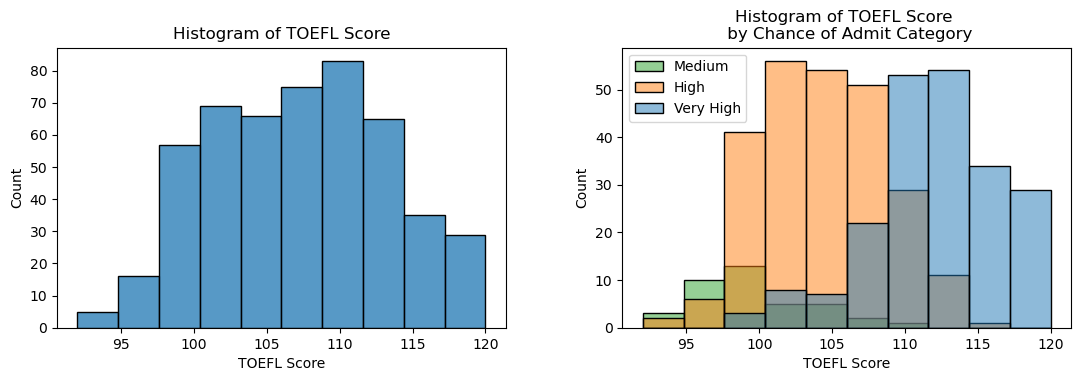

In [10]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# histogram of TOEFL scores
sns.histplot(x = 'TOEFL Score', data = ga_clean, ax = ax1, bins = 10)
ax1.title.set_text('Histogram of TOEFL Score')
plt.xlim()

# histogram of TOEFL scores by chance of admit category
sns.histplot(x = 'TOEFL Score', data = ga_clean, hue = 'COA Cat', ax = ax2, bins = 10)
ax2.title.set_text('Histogram of TOEFL Score \n by Chance of Admit Category')
ax2.legend(labels = ['Medium', 'High', 'Very High'], loc = 'upper left')


plt.tight_layout(pad = 5)
plt.show()

The Count Plot of University Rating (left) indicates most students go to a university with a rating of 3.0. The Count Plot of University Rating by Chance of Admit category (right) indicates:
- Most students with a 'very high' chance of being admitted to graduate school go to a university with a rating of 4.0.
- Very few students wtih a 'very high' chance of being admitted to graduate school go to a university with a rating of 1.0 or 2.0.
- Students with a 'high' chance of being admitted to graduate school go to either a university with a rating of 2.0 or 3.0.
- Most students with a 'medium' chance of being admitted to graduate school go to a university with a rating of 2.0, but none of them go to a university with a rating of 5.0.

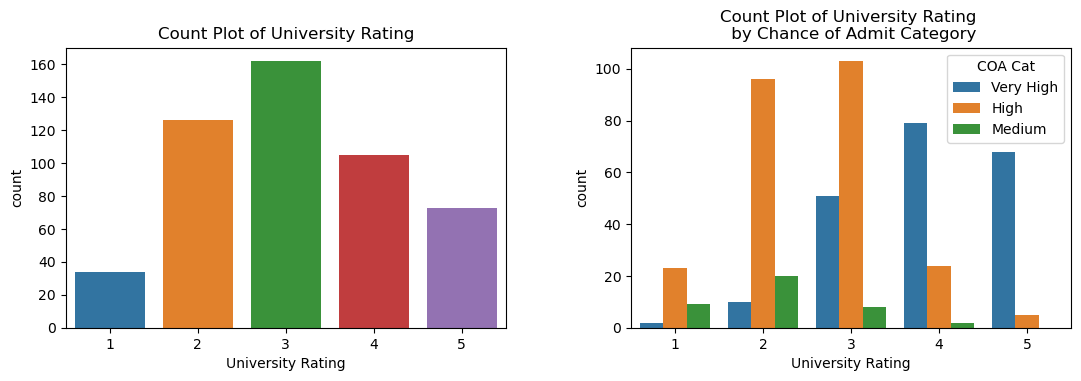

In [11]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# countplot of university rating
sns.countplot(x = 'University Rating', data = ga_clean, ax = ax1)
ax1.title.set_text('Count Plot of University Rating')

# countplot of university rating by chance of admit category
sns.countplot(x = 'University Rating', data = ga_clean, hue = 'COA Cat', ax = ax2)
ax2.title.set_text('Count Plot of University Rating \n by Chance of Admit Category')

plt.tight_layout(pad = 5)
plt.show()

The Count Plot of Statement of Purpose (SOP) Rating (left) indicates most students have a 4.0 rating on their SOP. The Count Plot of SOP by Chance of Admit category (right) indicates:
- Most students who have a 'very high' chance of being admitted into graduate school have a SOP rating of 4.0 or greater.
- It does not appear their is a definitive SOP rating students need to have a 'very high' chance of being admitted to graduate school.

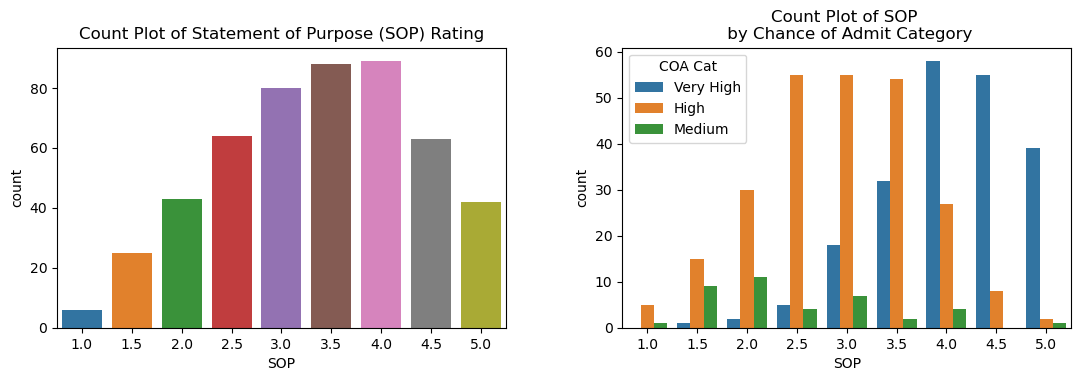

In [12]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.countplot(x = 'SOP', data = ga_clean, ax = ax1)
ax1.title.set_text('Count Plot of Statement of Purpose (SOP) Rating')


sns.countplot(x = 'SOP', data = ga_clean, hue = 'COA Cat', ax = ax2)
ax2.title.set_text('Count Plot of SOP \n by Chance of Admit Category')


plt.tight_layout(pad = 5)
plt.show()

The Count Plot of Letter of Recommendation (LOR) Rating (left) indicates most students have a LOr rating of 3.0. The Count Plot of LOR Rating by Chance of Admit category (right) indicates:
- Students who have either a 'high' or 'very high' chance of getting admitted to graduate school do not have a LOR rating of 1.0.
- Most students who have a 'high' chance of being admitted to graduate school have a LOR rating of 3.0.
- Most students who have a 'very high' chance of being admitted to graduate school have a LOR rating of 4.0.

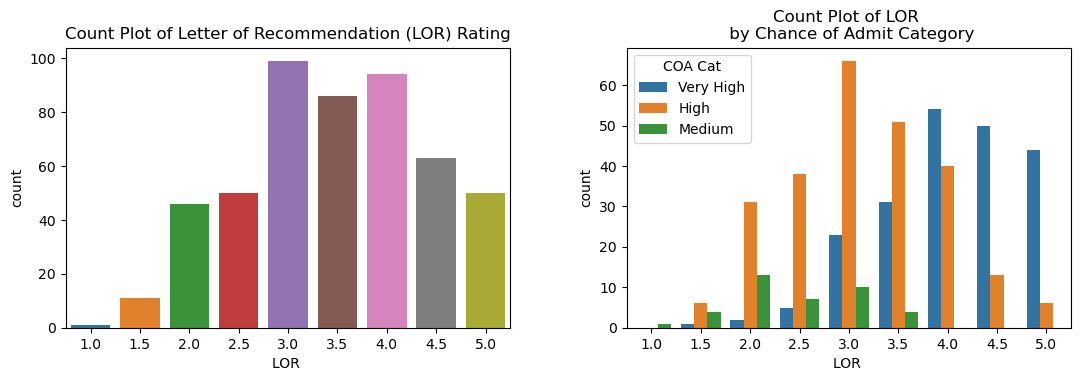

In [13]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.countplot(x = 'LOR ', data = ga_clean, ax = ax1)
ax1.title.set_text('Count Plot of Letter of Recommendation (LOR) Rating')


sns.countplot(x = 'LOR ', data = ga_clean, hue = 'COA Cat', ax = ax2)
ax2.title.set_text('Count Plot of LOR \n by Chance of Admit Category')


plt.tight_layout(pad = 5)
plt.show()

The CGPA (top) and GPA (bottom) histograms are identical. For a student to maximize their chances of being admitted into graduate school and have a 'very high' chance of getting admitted, they should aim to have, at minimum, a 8.0 CGPA (2.9 GPA).

In [14]:
ga_clean[['CGPA', 'GPA', 'COA Cat']].groupby('COA Cat').describe().transpose()

COA Cat           High     Medium   Very High
CGPA count  251.000000  39.000000  210.000000
     mean     8.260677   7.702821    9.116095
     std      0.367434   0.355187    0.366270
     min      7.230000   6.800000    8.000000
     25%      8.015000   7.445000    8.870000
     50%      8.260000   7.660000    9.110000
     75%      8.535000   7.980000    9.360000
     max      9.220000   8.600000    9.920000
GPA  count  251.000000  39.000000  210.000000
     mean     2.973844   2.773015    3.281794
     std      0.132276   0.127867    0.131857
     min      2.602800   2.448000    2.880000
     25%      2.885400   2.680200    3.193200
     50%      2.973600   2.757600    3.279600
     75%      3.072600   2.872800    3.369600
     max      3.319200   3.096000    3.571200

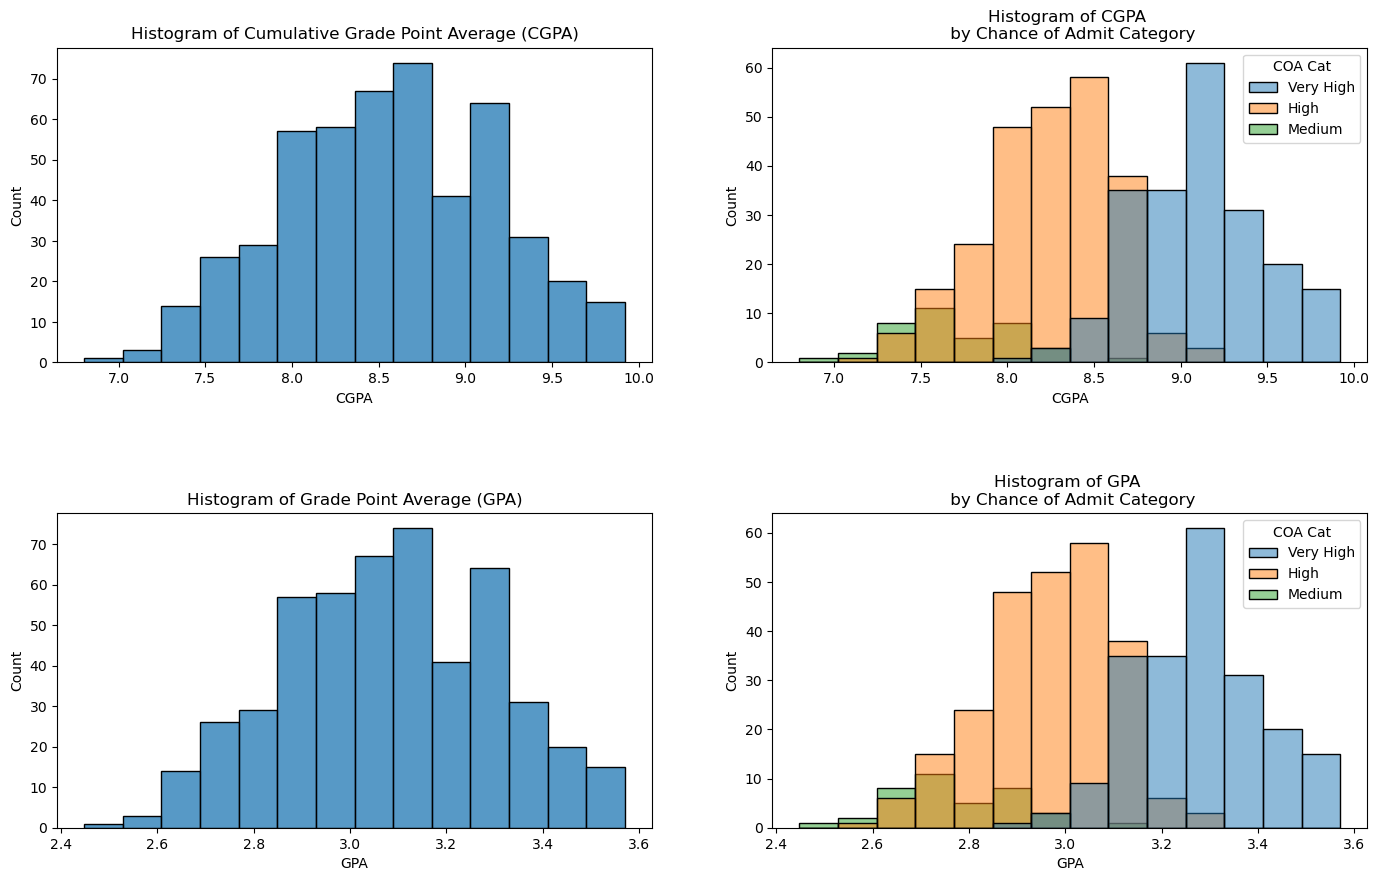

In [15]:
fig = plt.figure(figsize = (15,10), dpi = 100)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# CGPA histograms
sns.histplot(x = 'CGPA', data = ga_clean, ax = ax1)
ax1.title.set_text('Histogram of Cumulative Grade Point Average (CGPA)')


sns.histplot(x = 'CGPA', data = ga_clean, hue = 'COA Cat', ax = ax2)
ax2.title.set_text('Histogram of CGPA \n by Chance of Admit Category')

# GPA Histograms
sns.histplot(x = 'GPA', data = ga_clean, ax = ax3)
ax3.title.set_text('Histogram of Grade Point Average (GPA)')

sns.histplot(x = 'GPA', data = ga_clean, hue = 'COA Cat', ax = ax4)
ax4.title.set_text('Histogram of GPA \n by Chance of Admit Category')


plt.tight_layout(pad = 5)
plt.show()

The Count Plot for Research Experience (left) indicates more students have research experience than not. The Count Plot of Research Experience by Chance of Admit Category indicates students who have a 'very high' chance of getting admitted to graduate school have research experience. But even so, you can still have a 'high' chance of getting into graduate school without research experience.

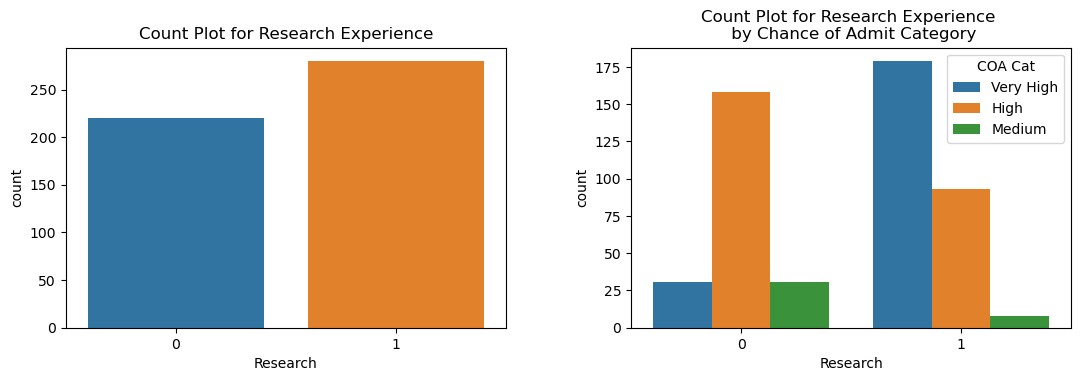

In [16]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.countplot(x = 'Research', data = ga_clean, ax = ax1)
ax1.title.set_text('Count Plot for Research Experience')


sns.countplot(x = 'Research', data = ga_clean, hue = 'COA Cat', ax = ax2)
ax2.title.set_text('Count Plot for Research Experience \n by Chance of Admit Category')


plt.tight_layout(pad = 5)
plt.show()

The Histogram of Chance of Admit (percentage) displays a marginal left skew. The Count Plot of Chance of Admit Categorized indicates most students have a 'high' chance of being admitted to graduate school.

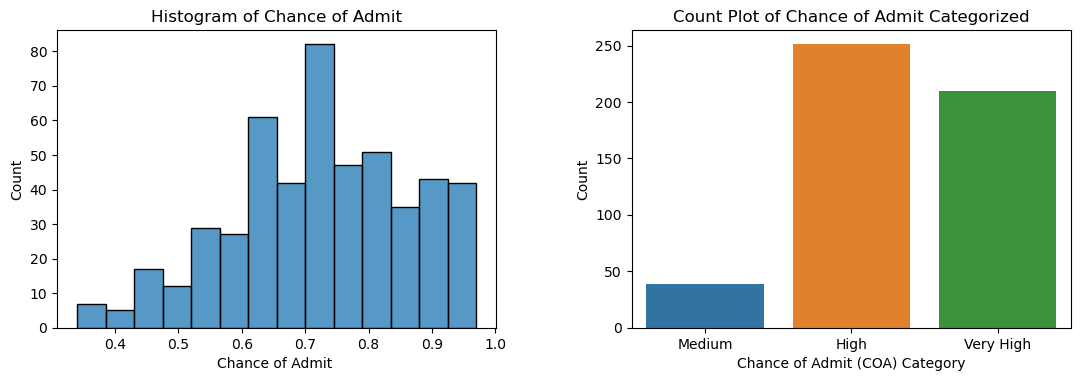

In [17]:
fig = plt.figure(figsize = (12,5), dpi = 100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.histplot(x = 'Chance of Admit ', data = ga_clean, ax = ax1)
ax1.title.set_text('Histogram of Chance of Admit')


sns.countplot(x = 'COA Cat', data = ga_clean, ax = ax2, order = ['Medium', 'High', 'Very High'])
ax2.title.set_text('Count Plot of Chance of Admit Categorized')
plt.xlabel('Chance of Admit (COA) Category')
plt.ylabel('Count')


plt.tight_layout(pad = 5)
plt.show()

The heatmap below indicates all numerical features have a strong, positive correlation with Chance of Admit with the weakest feature being Research. Since all features are strongly correlated, it might be reasonable to fit the model with ALL variables.

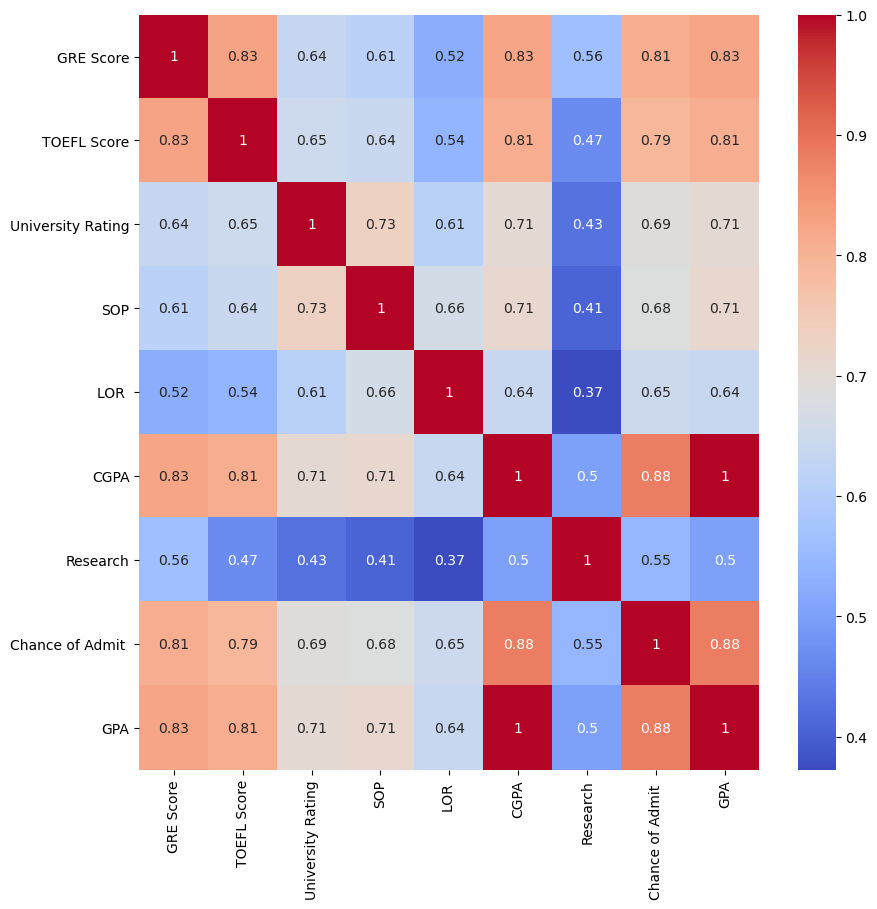

In [18]:
# all numerical features appear to be strongly, positively correlated with Chance of Admit - thus, it may be reasonable
# to keep all numerical features in the model
plt.figure(figsize = (10,10), dpi = 100)
sns.heatmap(ga_clean.corr(), annot = True, cmap = 'coolwarm')
plt.show()

[**BACK TO TOP**](#BTT)

# Model Building<a id='SPSC'></a>

In [19]:
# Will drop CGPA since it is redudant of GPA and will also drop 'COA Cat'
ga_final = ga_clean.drop(['CGPA', 'COA Cat'], axis = 1)
ga_final.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'Research', 'Chance of Admit ', 'GPA'],
      dtype='object')

# Split Data

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = ga_final.drop(['Chance of Admit '], axis = 1)
y = ga_final['Chance of Admit ']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Scale Data

The data are not on the same scale (e.g. GRE Score is in different units and larger numerically than University Rating). This could present issues in the analysis, so the data will be scaled using the StandardScaler.

In [30]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research,GPA
202,340,120,5,4.5,4.5,1,3.5676
428,316,103,2,2.0,4.5,0,3.1464
392,326,112,4,4.0,3.5,1,3.2832
86,315,106,3,4.5,3.5,0,3.0312
443,321,114,5,4.5,4.5,1,3.2976


In [22]:
from sklearn.preprocessing import StandardScaler

In [268]:
scaler = StandardScaler()

In [270]:
X_train_SS = scaler.fit_transform(X_train)
X_train_SS.shape

(350, 7)

In [271]:
X_test_SS = scaler.transform(X_test)
X_test_SS.shape

(150, 7)

[**BACK TO TOP**](#BTT)

# Multiple Linear Regression (Full Model) <a id='LRF'></a>

After scaling the data using the StandardScaler, the full model is fitted.

**Features in the model:**
- GRE Score
- TOEFL Score
- University Rating
- SOP
- LOR
- Research
- GPA

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
lm = LinearRegression()

In [274]:
# fit the model
lm.fit(X_train_SS, y_train)

LinearRegression()

The $R^2$ value indicates that 82.6% of the variation in chance of admit is due to the 6 features.

In [275]:
# obtain R^2
lm.score(X_test_SS, y_test)

0.8260541587118344

In [276]:
# obtain predictions
pred = lm.predict(X_test_SS)

The Actual vs. Predicted Scatter Plot below indicates the full model is, in general, a good fit. This is indicated by the closeness of the plotted points to the red superimposed regression line.

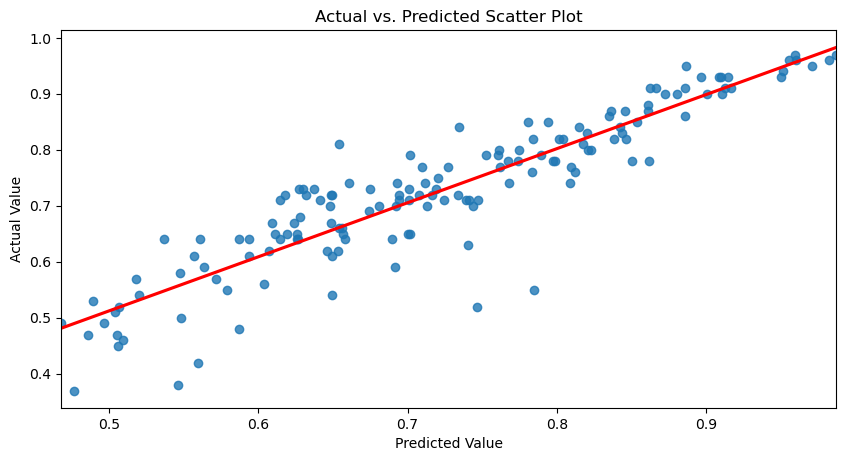

In [277]:
# Actual vs. Predicted Scatterplot
plt.figure(figsize=(10, 5), dpi = 100)
sns.regplot(x = pred, y = y_test, ci = None, line_kws={'color':'r'})
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [278]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

The MAE value indicates that on average the absolute chance of admit will be 0.040 (or 4%) from its true value. The RMSE value indicates that on average, chance of admit will be 0.057 (or 5.7%) away from its true value.

In [279]:
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
pd.DataFrame([MAE, MSE, RMSE], index = ['MAE', 'MSE', 'RMSE'], columns = ['Value'])

,Value
MAE,0.040860
MSE,0.003213
RMSE,0.056684


This model is a good starting point. However, a more parsimonious model may perform better.

[**BACK TO TOP**](#BTT)

# SelectKBest <a id='LRSKB'></a>

SelectKBest is used to assess which features are the most important to keep in the model. The bar chart below indicates the most important features are GPA, GRE, and TOEFL score.

In [280]:
from sklearn.feature_selection import SelectKBest, f_regression

In [281]:
selections = SelectKBest(score_func=f_regression, k = 'all').fit(X_train_SS, y_train)

In [282]:
# obtain scores and create a dataframe
scores = selections.scores_
col_names = X_train.columns

selections_results = pd.DataFrame([scores], columns = col_names).transpose()
selections_results = selections_results.reset_index()
selections_results.columns = ['Feature', 'Score']
selections_results_sorted = selections_results.sort_values(by = 'Score')

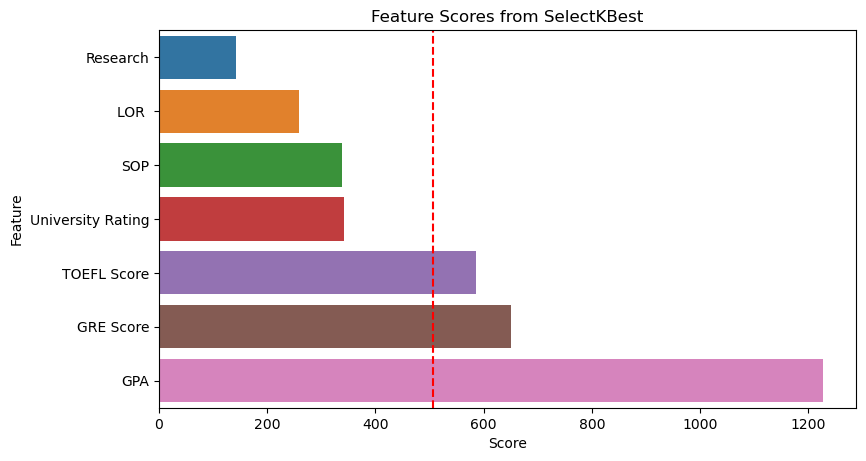

In [283]:
# graph the results with the reference line at the mean for the scores
plt.figure(figsize=(9, 5), dpi = 100)
sns.barplot(x = 'Score', y = 'Feature', data = selections_results_sorted)
plt.axvline(np.mean(selections_results_sorted['Score']), color = 'red', linestyle = '--')
plt.title('Feature Scores from SelectKBest')
plt.show()

In [347]:
# New X with the 3 most important features - GRE, TOEFL, and GPA
X = ga_final[['GRE Score', 'TOEFL Score', 'GPA']]
y = ga_final['Chance of Admit ']

In [348]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [349]:
# scale data
new_scaler = StandardScaler()
new_X_train = new_scaler.fit_transform(X_train, y_train)
new_X_test = new_scaler.transform(X_test)

In [350]:
# instance of linear reg model
lm_SKB = LinearRegression()

In [351]:
# fit model
lm_SKB.fit(new_X_train, y_train)

LinearRegression()

The $R^2$ value indicates that 80.5% of the variance in chance of admit can be explained by GRE score, TOEFL score and GPA. The $R^2$ value for the reduced model is smaller than the full model (82.6% vs. 80.5%). However, it's a relatively small difference and the reduced model is simpler and more practical for graduate students. Thus, the reduced model is optimal.

In [535]:
# R^2 value
round(lm_SKB.score(new_X_test, y_test),3)

0.805

In [353]:
# get predicted values
SKB_pred = lm_SKB.predict(new_X_test)

The Actual vs. Predicted Value Scatter Plot indicates the model is a relatively good fit. Most plotted points are along the red superimposed line. There are some points in the bottom middle that deviate further from the line. The model appears to have difficulty making accurate predictions for students who had a true lower chance of getting into graduate school.

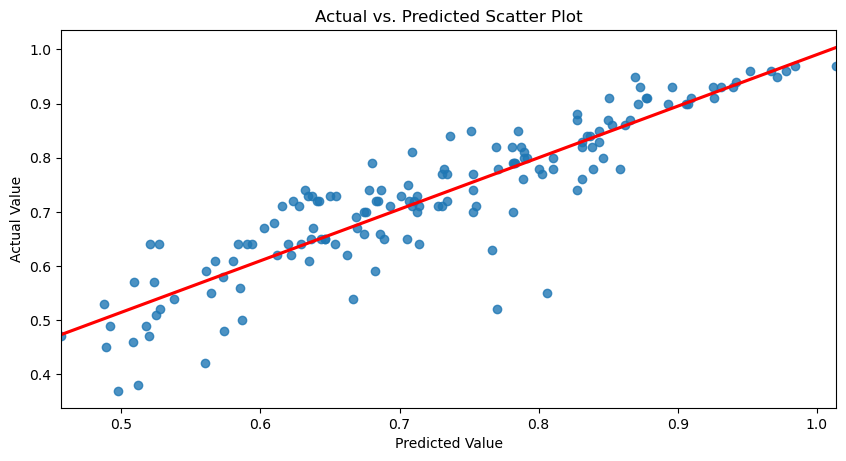

In [354]:
# Actual vs. Predicted Scatterplot
plt.figure(figsize=(10, 5), dpi = 100)
sns.regplot(x = SKB_pred, y = y_test, ci = None, line_kws={'color':'r'})
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

The MAE value indicates that on average, the absolute chance of admit would be 0.042 (or 4.2%) away from its true value. The RMSE value indicates that on average, chance of admit will be 0.06 (or 6%) away from its true value.

In [355]:
MAE = mean_absolute_error(y_test, SKB_pred)
MSE = mean_squared_error(y_test, SKB_pred)
RMSE = np.sqrt(mean_squared_error(y_test, SKB_pred))
pd.DataFrame([MAE, MSE, RMSE], index = ['MAE', 'MSE', 'RMSE'], columns = ['Value'])

,Value
MAE,0.042323
MSE,0.003602
RMSE,0.060014


[**BACK TO TOP**](#BTT)

# Make predictions for 7 students <a id='PRED'></a>

In [537]:
# printing out the min and max score of the 3 features to create predictions within the KNOWN values
for i in ['GRE Score', 'TOEFL Score', 'GPA']:
    print(i,'\n','Min:', ga_final[i].min(),'\n','Max:',ga_final[i].max(), '\n')

GRE Score 
 Min: 290 
 Max: 340 

TOEFL Score 
 Min: 92 
 Max: 120 

GPA 
 Min: 2.448 
 Max: 3.5712 



In [423]:
import random

In [538]:
# create 7 random values for GRE, TOEFL and GPA
array = np.array([[random.randint(290,341), random.randint(92, 121),random.randrange(245, 358)/100],
                 [random.randint(290,341), random.randint(92, 121), random.randrange(245, 358)/100],
                 [random.randint(290,341), random.randint(92, 121),random.randrange(245, 358)/100],
                 [random.randint(290,341), random.randint(92, 121),random.randrange(245, 358)/100],
                 [random.randint(290,341), random.randint(92, 121),random.randrange(245, 358)/100],
                 [random.randint(290,341), random.randint(92, 121),random.randrange(245, 358)/100],
                 [random.randint(290,341), random.randint(92, 121),random.randrange(245, 358)/100]])

In [525]:
# scale the data
newvals = new_scaler.transform(array)

In [539]:
# data frame for raw scores (no transformation applied)
raw_scores = pd.DataFrame(array)

# predicted values from the scaled data
pred_chance = pd.DataFrame(lm_SKB.predict(newvals))

# combine raw scores with the predicted values
predictions = pd.concat([raw_scores, pred_chance], axis = 1)

# rename columns of the concatenated data frame
predictions.columns = ['GRE', 'TOEFL', 'GPA', 'Chance of Admit']

# output raw values and the predictions
predictions.sort_values(by = 'Chance of Admit', ascending=False)

,GRE,TOEFL,GPA,Chance of Admit
0,307.0,117.0,3.57,0.832303
4,324.0,99.0,3.31,0.813122
5,291.0,100.0,2.89,0.766744
6,329.0,118.0,2.65,0.639743
3,310.0,103.0,3.16,0.589008
2,337.0,93.0,3.15,0.585605
1,302.0,102.0,3.32,0.522497


# Key takeaways<a id='KN'></a>
- GPA (or CGPA) holds the greatest weight in determining chance of admission into graduate school.
- Along with GPA, GRE and TOEFL scores are important in determining chance of admit.
- Research experience is not of much importance.
- Students should focus on improving their grades and standardized test scores to maximize their chances of getting into graduate school.

## Next steps
- Collect new data for students with GPA's higher than 3.57.
- Modernize GRE and TOEFL scores to current point scales
- Create a program that converts user input into a predicted chance of admissions

[**BACK TO TOP**](#BTT)